In [38]:
import pandas as pd
import numpy as np
# import matplotlib as plt
import seaborn as sb

In [39]:
raw_data = pd.read_csv('D:\日常学习\毕业设计\数据\city_bike_data\citibike_tripdata_202107\citibike_tripdata_202107.csv')

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [40]:
raw_data.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,247BA541A9674BF3,classic_bike,2021-07-09 16:05:36,2021-07-09 16:18:09,5 Ave & E 93 St,7372.10,Frederick Douglass Blvd & W 117 St,7688.12,40.785785,-73.957481,40.805159,-73.954692,member
1,125C9ACA270A5E2D,classic_bike,2021-07-11 16:23:35,2021-07-11 16:29:07,5 Ave & E 93 St,7372.10,E 88 St & Park Ave,7293.10,40.785785,-73.957481,40.781411,-73.955959,member
2,2E26264BCC15BA05,classic_bike,2021-07-23 06:22:40,2021-07-23 06:36:13,34 St & 38 Ave,6453.02,McGuinness Blvd & Eagle St,5977.01,40.752443,-73.929737,40.735550,-73.952840,member
3,A56D23A088563424,classic_bike,2021-07-05 16:08:10,2021-07-05 16:36:00,Lenox Ave & W 111 St,7602.05,5 Ave & E 78 St,7161.08,40.798786,-73.952300,40.776321,-73.964274,casual
4,1451F4BB884C5335,classic_bike,2021-07-26 12:28:57,2021-07-26 12:30:21,6 Ave & Broome St,5610.09,6 Ave & Canal St,5500.07,40.724310,-74.004730,40.722438,-74.005664,casual


In [41]:
raw_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3084537 entries, 0 to 3084536
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    float64
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(5), object(8)
memory usage: 305.9+ MB


In [42]:
nyc_bike = raw_data.copy()

In [43]:
len(nyc_bike['start_station_name'].unique())

1493

In [44]:
# 车量数目
len(nyc_bike['ride_id'].unique())  # 订单数目id

3084537

In [45]:
# 计算骑行时长
nyc_bike['started_at'] = pd.to_datetime(nyc_bike['started_at'])
nyc_bike['ended_at'] = pd.to_datetime(nyc_bike['ended_at'])
nyc_bike.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,247BA541A9674BF3,classic_bike,2021-07-09 16:05:36,2021-07-09 16:18:09,5 Ave & E 93 St,7372.10,Frederick Douglass Blvd & W 117 St,7688.12,40.785785,-73.957481,40.805159,-73.954692,member
1,125C9ACA270A5E2D,classic_bike,2021-07-11 16:23:35,2021-07-11 16:29:07,5 Ave & E 93 St,7372.10,E 88 St & Park Ave,7293.10,40.785785,-73.957481,40.781411,-73.955959,member
2,2E26264BCC15BA05,classic_bike,2021-07-23 06:22:40,2021-07-23 06:36:13,34 St & 38 Ave,6453.02,McGuinness Blvd & Eagle St,5977.01,40.752443,-73.929737,40.735550,-73.952840,member
3,A56D23A088563424,classic_bike,2021-07-05 16:08:10,2021-07-05 16:36:00,Lenox Ave & W 111 St,7602.05,5 Ave & E 78 St,7161.08,40.798786,-73.952300,40.776321,-73.964274,casual
4,1451F4BB884C5335,classic_bike,2021-07-26 12:28:57,2021-07-26 12:30:21,6 Ave & Broome St,5610.09,6 Ave & Canal St,5500.07,40.724310,-74.004730,40.722438,-74.005664,casual


In [46]:
sample1 = nyc_bike.iloc[1:3,:].copy()

sample1['duration'] = ((sample1['ended_at']-sample1['started_at'])/pd.Timedelta(1,'S')).fillna(0).astype(int)


In [47]:
# filna(0)空值用0填充；astype 转换数据类型，时间为s数
nyc_bike['duration'] = ((nyc_bike['ended_at']-nyc_bike['started_at'])/pd.Timedelta(1,'S')).fillna(0).astype(int)

In [48]:
# sample1['started_at'] = (sample1['started_at']).astype('str')

In [49]:
time_split = pd.DataFrame((str(x).split(' ') for x in sample1.started_at), index=sample1.index, columns=['start_date', 'start_time'])

In [50]:
sample1 = pd.merge(sample1, time_split, right_index=True, left_index=True)

In [51]:
time_split = pd.DataFrame((str(x).split(' ') for x in nyc_bike.started_at), index=nyc_bike.index, columns=['start_date', 'start_time'])


In [52]:
nyc_bike = pd.merge(nyc_bike, time_split, left_index=True, right_index=True)

In [53]:
nyc_bike.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3084537 entries, 0 to 3084536
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    float64       
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  duration            int32         
 14  start_date          object        
 15  start_time          object        
dtypes: datetime64[ns](2), float64(5), int32(1), object(8)
memory usage: 364.8+ MB


In [58]:
# 更改start_time 为 日期格式
nyc_bike['start_time'] = nyc_bike['start_time'].dt.time

AttributeError: Can only use .dt accessor with datetimelike values

In [59]:
nyc_bike = nyc_bike.set_index('start_time')


In [68]:
nyc_bike.drop(labels='start_date',axis=1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
start_time,,,,,,,,,,,,,,
16:05:36,247BA541A9674BF3,classic_bike,2021-07-09 16:05:36,2021-07-09 16:18:09,5 Ave & E 93 St,7372.10,Frederick Douglass Blvd & W 117 St,7688.12,40.785785,-73.957481,40.805159,-73.954692,member,753
16:23:35,125C9ACA270A5E2D,classic_bike,2021-07-11 16:23:35,2021-07-11 16:29:07,5 Ave & E 93 St,7372.10,E 88 St & Park Ave,7293.10,40.785785,-73.957481,40.781411,-73.955959,member,332
06:22:40,2E26264BCC15BA05,classic_bike,2021-07-23 06:22:40,2021-07-23 06:36:13,34 St & 38 Ave,6453.02,McGuinness Blvd & Eagle St,5977.01,40.752443,-73.929737,40.735550,-73.952840,member,813
16:08:10,A56D23A088563424,classic_bike,2021-07-05 16:08:10,2021-07-05 16:36:00,Lenox Ave & W 111 St,7602.05,5 Ave & E 78 St,7161.08,40.798786,-73.952300,40.776321,-73.964274,casual,1670
12:28:57,1451F4BB884C5335,classic_bike,2021-07-26 12:28:57,2021-07-26 12:30:21,6 Ave & Broome St,5610.09,6 Ave & Canal St,5500.07,40.724310,-74.004730,40.722438,-74.005664,casual,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14:08:12,70330CE2E6FF7873,classic_bike,2021-07-08 14:08:12,2021-07-08 14:35:15,DeKalb Ave & S Portland Ave,4546.04,E 16 St & 5 Ave,6022.04,40.689810,-73.974931,40.737262,-73.992390,casual,1623
12:26:49,5F986BABD3470AC0,classic_bike,2021-07-24 12:26:49,2021-07-24 12:47:18,9 Ave & W 18 St,6190.08,West St & Liberty St,5184.08,40.743174,-74.003664,40.711444,-74.014847,casual,1229
17:11:16,88946134552A99EC,classic_bike,2021-07-04 17:11:16,2021-07-04 17:18:23,DeKalb Ave & S Portland Ave,4546.04,Willoughby Ave & Hall St,4611.03,40.689810,-73.974931,40.691960,-73.965369,casual,427


In [70]:
nyc_bike.reset_index(drop=True)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,start_date
0,247BA541A9674BF3,classic_bike,2021-07-09 16:05:36,2021-07-09 16:18:09,5 Ave & E 93 St,7372.10,Frederick Douglass Blvd & W 117 St,7688.12,40.785785,-73.957481,40.805159,-73.954692,member,753,2021-07-09
1,125C9ACA270A5E2D,classic_bike,2021-07-11 16:23:35,2021-07-11 16:29:07,5 Ave & E 93 St,7372.10,E 88 St & Park Ave,7293.10,40.785785,-73.957481,40.781411,-73.955959,member,332,2021-07-11
2,2E26264BCC15BA05,classic_bike,2021-07-23 06:22:40,2021-07-23 06:36:13,34 St & 38 Ave,6453.02,McGuinness Blvd & Eagle St,5977.01,40.752443,-73.929737,40.735550,-73.952840,member,813,2021-07-23
3,A56D23A088563424,classic_bike,2021-07-05 16:08:10,2021-07-05 16:36:00,Lenox Ave & W 111 St,7602.05,5 Ave & E 78 St,7161.08,40.798786,-73.952300,40.776321,-73.964274,casual,1670,2021-07-05
4,1451F4BB884C5335,classic_bike,2021-07-26 12:28:57,2021-07-26 12:30:21,6 Ave & Broome St,5610.09,6 Ave & Canal St,5500.07,40.724310,-74.004730,40.722438,-74.005664,casual,84,2021-07-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084532,70330CE2E6FF7873,classic_bike,2021-07-08 14:08:12,2021-07-08 14:35:15,DeKalb Ave & S Portland Ave,4546.04,E 16 St & 5 Ave,6022.04,40.689810,-73.974931,40.737262,-73.992390,casual,1623,2021-07-08
3084533,5F986BABD3470AC0,classic_bike,2021-07-24 12:26:49,2021-07-24 12:47:18,9 Ave & W 18 St,6190.08,West St & Liberty St,5184.08,40.743174,-74.003664,40.711444,-74.014847,casual,1229,2021-07-24
3084534,88946134552A99EC,classic_bike,2021-07-04 17:11:16,2021-07-04 17:18:23,DeKalb Ave & S Portland Ave,4546.04,Willoughby Ave & Hall St,4611.03,40.689810,-73.974931,40.691960,-73.965369,casual,427,2021-07-04
3084535,5AA6219AC31E068E,classic_bike,2021-07-30 09:43:46,2021-07-30 09:57:50,9 Ave & W 18 St,6190.08,Allen St & Stanton St,5484.09,40.743174,-74.003664,40.722055,-73.989111,member,844,2021-07-30


In [72]:
# 增加day_id, hour_id weekdays/weekends

nyc_bike['day_id'] = nyc_bike.started_at.apply(lambda x: x.isoweekday())

In [73]:
nyc_bike['date_id'] = nyc_bike.start_date.apply(lambda x:str(x).split('-')[-1])

In [74]:
nyc_bike['day_type'] = nyc_bike.day_id.apply(lambda x: 'weekends' if x == 6 or x == 7 else 'weekdays')

In [75]:
# 增加hour_id
nyc_bike['hour_id'] = nyc_bike.started_at.apply(lambda x: x.utctimetuple().tm_hour)

In [76]:
nyc_bike['day_id'].value_counts()

6    507428
5    501244
4    450033
3    434653
7    403014
2    400723
1    387442
Name: day_id, dtype: int64

In [82]:
ride_day =nyc_bike['day_id'].value_counts()
ride_day = ride_day.sort_index()

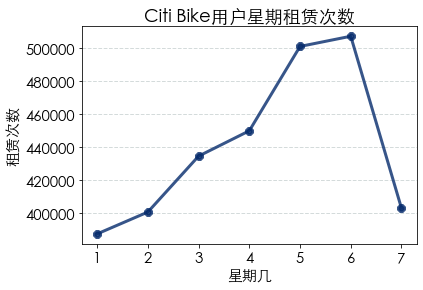

In [83]:
import matplotlib.pyplot as plt

plt.rc('font', family='STXihei', size=15)
a=np.array([1,2,3,4,5,6,7])
plt.bar([1,2,3,4,5,6,7],ride_day,color='#39A2E1',alpha=0.8,align='center',edgecolor='white')

plt.plot(ride_day,'8',ride_day,'g-',color='#052B6C',linewidth=3
,markeredgewidth=3,markeredgecolor='#052B6C',alpha=0.8)
plt.xlabel('星期几')
plt.ylabel('租赁次数')
plt.title('Citi Bike用户星期租赁次数')
plt.grid( color='#95a5a6',linestyle='--', linewidth=1 ,axis='y',alpha=0.4)
plt.xticks(a, ('1','2','3','4','5','6','7') )
plt.show()

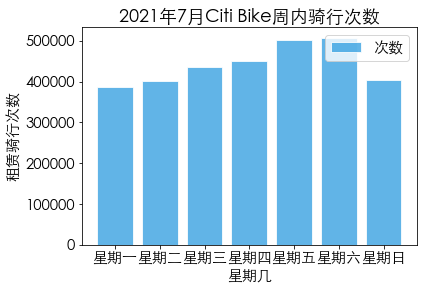

In [88]:
import matplotlib.pyplot as plt
plt.rc('font', family='STXihei', size=15)
a=np.array([1,2,3,4,5,6,7])
plt.bar([1,2,3,4,5,6,7],ride_day,color='#39A2E1',alpha=0.8,align='center',edgecolor='white')
plt.xlabel('星期几')
plt.ylabel('租赁骑行次数')
plt.title('2021年7月Citi Bike周内骑行次数')
plt.legend(['次数'],loc='upper right')
# plt.grid(color='#95a5a6',Linestyle='--',linewidth=1,axis='both')
plt.xticks(a,('星期一','星期二','星期三','星期四','星期五','星期六','星期日'))
plt.show()#绘制柱状图